In [55]:
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob 
from keras.models import Model
%matplotlib inline

In [81]:
CAT_IMAGE_DIR = "/Users/thomasorkild/Downloads/kagglecatsanddogs_3367a/PetImages/Cat/"
DOG_IMAGE_DIR = "/Users/thomasorkild/Downloads/kagglecatsanddogs_3367a/PetImages/Dog/"
INPUT_SIZE = (224,224)

In [38]:
net = keras.applications.mobilenet_v2.MobileNetV2(include_top=True, weights='imagenet')
#net.layers.pop()
net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

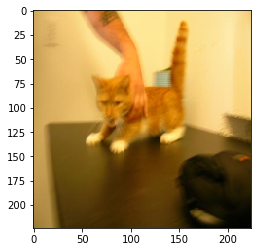

In [25]:
im = cv2.imread(CAT_IMAGE_DIR + "0.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, INPUT_SIZE)
plt.imshow(im)

In [45]:
model = Model(inputs = net.input, outputs=net.layers[-2].output)

In [78]:
cat_df = pd.DataFrame(columns = ["X"+str(i) for i in range(1280)]) 
cat_image_files = glob.glob(CAT_IMAGE_DIR + "*.jpg")[:100]

for i, file in enumerate(cat_image_files):
    im = cv2.imread(file)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, INPUT_SIZE)
    out = model.predict(np.reshape(im, (1, 224,224,3)))
    cat_df.loc[i]=out[0,:]
    if i % 100 ==0:
        print(i)
        
cat_df.to_csv("cats.csv")

0


In [82]:
dog_df = pd.DataFrame(columns = ["X"+str(i) for i in range(1280)]) 
dog_image_files = glob.glob(DOG_IMAGE_DIR + "*.jpg")[:100]

for i, file in enumerate(dog_image_files):
    im = cv2.imread(file)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, INPUT_SIZE)
    out = model.predict(np.reshape(im, (1, 224,224,3)))
    dog_df.loc[i]=out[0,:]
    if i % 100 ==0:
        print(i)
        
dog_df.to_csv("dogs.csv")

0
